# Avian Disease Prediction Analysis based on Government dashboard and external resources

This study will focus on using data from Death counts, 6 diagnosis: including Egg Peritonitis & Salpingiti, Colisepticaemia Yolk sac infection/ omphalitis, Broiler ascites, Red Mite, Marek's Disease and other resources such as weather, temperature, etc. based on regions to detect early case of outbreaks of Avian Disease on poultry and suggest prevention methods based on these findings.

Avian Disease dashboard: https://public.tableau.com/app/profile/siu.apha/viz/AvianDashboard/Overview

## Regression Models

### Importing libraries

In [59]:
# Importing the libraries
import os
os.environ['OMP_NUM_THREADS'] = '1'
import warnings
warnings.filterwarnings('ignore')
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import matplotlib.dates as mdates
import statsmodels.api as sm
from datetime import datetime
from collections import defaultdict
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.dummy import DummyRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import display
from scipy.stats import shapiro
from scipy.stats import median_abs_deviation
from scipy.stats import norm
from scipy.stats import bootstrap
from scipy.stats import chi2_contingency
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

### Linear Regression

In [8]:
# Read the collected dataset
df = pd.read_excel ('AvianDataset.xlsx', sheet_name = 'Number')

# Replace \n with a space for clearer column names
pd.set_option('display.max_colwidth', None)
df.columns = df.columns.str.replace('\n', ' ')

df

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,...,Min_temp West Midlands,Days of frost West Midlands,Hours of rainfall West Midlands,Hours of sunshine West Midlands,Max_temp South East,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Total death
0,1,1,2012,0,0,3,0,2,0,0,...,1.9,9.4,62.7,69.7,9.3,2.8,8.4,48.7,73.2,3
1,2,2,2012,0,1,2,2,0,0,0,...,0.5,13.3,29.1,69.1,7.2,0.3,14.5,19.3,83.7,3
2,3,3,2012,0,0,2,0,0,0,2,...,3.1,2.7,22.9,167.6,13.5,3.3,2.3,26.6,174.5,2
3,4,4,2012,0,1,3,0,0,0,0,...,2.9,5.0,140.2,116.8,12.2,3.4,4.4,133.8,155.7,4
4,5,5,2012,0,2,0,0,0,0,0,...,6.8,0.6,51.7,196.2,17.1,8.1,0.0,42.7,191.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,8,2024,0,0,2,0,2,0,0,...,12.0,0.0,33.5,171.7,22.8,13.0,0.0,41.0,209.2,2
152,153,9,2024,0,1,1,1,0,0,0,...,9.7,0.0,157.4,110.4,18.9,10.6,0.0,157.4,129.8,2
153,154,10,2024,0,0,2,0,0,0,2,...,7.5,0.5,82.1,96.9,15.7,8.4,0.1,91.2,88.0,2
154,155,11,2024,0,0,0,0,0,0,0,...,3.8,7.0,74.8,58.5,10.8,5.0,5.7,87.9,54.0,0


#### Baseline model: Use mean of target variable for training

In [9]:
# Define features and target
features = df.drop(columns=['Total death', 'No.', 'Month', 'Year'])
target = df['Total death']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Initialize metrics dictionary for 'Total death'
metrics_total_death_baseline = {
    'Model': ['Baseline (Mean)'],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'Normalized RMSE': [],
    'R-squared': []
}

# Predict using mean value as baseline
mean_total = y_train.mean()
predictions_baseline = [mean_total] * len(y_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions_baseline)
mse = mean_squared_error(y_test, predictions_baseline)
rmse = np.sqrt(mse)
normalized_rmse = rmse / (y_test.max() - y_test.min())
r2 = r2_score(y_test, predictions_baseline)

# Store metrics
metrics_total_death_baseline['MAE'].append(mae)
metrics_total_death_baseline['MSE'].append(mse)
metrics_total_death_baseline['RMSE'].append(rmse)
metrics_total_death_baseline['Normalized RMSE'].append(normalized_rmse)
metrics_total_death_baseline['R-squared'].append(r2)

# Convert to DataFrame and display
df_metrics_total_death_baseline = pd.DataFrame(metrics_total_death_baseline)
display(df_metrics_total_death_baseline)

,Model,MAE,MSE,RMSE,Normalized RMSE,R-squared
0,Baseline (Mean),2.4375,14.8125,3.848701,0.213817,-0.004237


#### Simple Linear Regression

In [10]:
# Calculate the correlation matrix (numeric columns only)
corr_matrix = df.corr(numeric_only=True)

# Get the top 5 variables most correlated with 'Total death'
top_5_total_death = (
    corr_matrix['Total death']
    .drop(['No.', 'Month', 'Year', 'Total death'])  # exclude non-feature columns and the target itself
    .abs() 
    .nlargest(5) 
    .index
    .tolist()
)

top_5_total_death

['Immature', 'Scotland', 'Adult', 'East of England', 'Colisepticaemia']

In [21]:
# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    df[top_5_total_death], df['Total death'], test_size=0.2, random_state=42
)

# Initialize metrics dictionary for 'Total death'
metrics_total_death = {
    'Variable': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'Normalized RMSE': [],
    'R-squared': []
}

# Build simple linear regression models and calculate metrics
for variable in top_5_total_death:
    # Train the model using a single feature
    model = LinearRegression()
    model.fit(X_train[[variable]], y_train)

    # Predict on the test set
    predictions = model.predict(X_test[[variable]])

    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    normalized_rmse = rmse / (y_test.max() - y_test.min())
    r2 = r2_score(y_test, predictions)

    # Store the metrics
    metrics_total_death['Variable'].append(variable)
    metrics_total_death['MAE'].append(mae)
    metrics_total_death['MSE'].append(mse)
    metrics_total_death['RMSE'].append(rmse)
    metrics_total_death['Normalized RMSE'].append(normalized_rmse)
    metrics_total_death['R-squared'].append(r2)

# Convert the metrics dictionary to a DataFrame for 'Total death'
df_metrics_total_death = pd.DataFrame(metrics_total_death)

# Sort the DataFrame by 'R-squared' in descending order
df_metrics_total_death_sorted = df_metrics_total_death.sort_values(by='R-squared', ascending=False)

df_metrics_total_death_ranked

,Rank,Variable,R-squared,MAE,MSE,RMSE,Normalized RMSE
1,1,Scotland,0.665805,1.452310,3.173548,1.781446,0.137034
0,2,Immature,0.633157,1.412871,3.483573,1.866433,0.143572
2,3,Adult,0.580151,1.286482,3.986929,1.996730,0.153595
3,4,East of England,0.257825,1.962041,7.047759,2.654762,0.204212
4,5,Colisepticaemia,0.111335,1.925269,8.438844,2.904969,0.223459


#### Multiple Linear Regression

Correlation with Total death

In [12]:
# Calculate correlation matrix (numeric columns only)
corr_matrix = df.corr(numeric_only=True)

# Drop irrelevant columns and get absolute correlations with 'Total death'
correlations = corr_matrix['Total death'].drop(['Total death', 'No.', 'Month', 'Year']).abs()

# Rank all features by correlation strength (descending)
correlation_ranking = correlations.sort_values(ascending=False).reset_index()
correlation_ranking.columns = ['Feature', 'Absolute Correlation with Total death']

# Display the ranking table
display(correlation_ranking)

,Feature,Absolute Correlation with Total death
0,Immature,0.841964
1,Scotland,0.692606
2,Adult,0.673066
3,East of England,0.579395
4,Colisepticaemia,0.521873
5,West Midlands,0.508917
6,South East,0.481181
7,Broiler ascites,0.461032
8,Egg Peritonitis & Salpingitis,0.444190
9,Red Mite,0.426168


In [32]:
# Remove non-feature and target columns
feature_df = df.drop(columns=['Total death', 'No.', 'Month', 'Year'])

# Compute the correlation matrix
corr_matrix = feature_df.corr(numeric_only=True)

# Keep only the upper triangle (avoid duplicates and self-correlation)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Convert to long format and sort by absolute correlation
correlation_pairs = (
    upper_triangle.stack()
    .abs()
    .sort_values(ascending=False)
    .reset_index()
)

# Rename the columns for clarity
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Absolute Correlation']

display(correlation_pairs.head(50))

,Feature 1,Feature 2,Absolute Correlation
0,Max_temp Southwest,Max_temp Wales,0.998856
1,Min_temp Southwest,Min_temp Wales,0.998340
2,Max_temp East of England,Max_temp South East,0.997959
3,Min_temp East of England,Min_temp South East,0.997765
4,Max_temp West Midlands,Max_temp South East,0.997651
5,Min_temp East of England,Min_temp West Midlands,0.997166
6,Max_temp Wales,Max_temp West Midlands,0.996808
7,Max_temp Southwest,Max_temp West Midlands,0.996734
8,Max_temp Southwest,Max_temp South East,0.996687
9,Min_temp Wales,Min_temp West Midlands,0.996326


=> Remove features that are highly correlated (r > 0.5) to avoid multicollinearity

In [33]:
# Drop non-feature and target columns
features_only = df.drop(columns=['Total death', 'No.', 'Month', 'Year'])
target = df['Total death']

# Compute correlation matrix and keep upper triangle
corr_matrix = features_only.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with correlation > 0.5
high_corr_pairs = upper_triangle.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.5]

# Group correlated features
from collections import defaultdict

# Build a graph-like structure to cluster correlated features
groups = []
visited = set()

for i, row in high_corr_pairs.iterrows():
    f1, f2 = row['Feature 1'], row['Feature 2']
    found = False
    for group in groups:
        if f1 in group or f2 in group:
            group.update([f1, f2])
            found = True
            break
    if not found:
        groups.append(set([f1, f2]))

# Merge overlapping sets
merged_groups = []
while groups:
    first, rest = groups[0], groups[1:]
    first = set(first)
    changed = True
    while changed:
        changed = False
        rest2 = []
        for g in rest:
            if first & g:
                first |= g
                changed = True
            else:
                rest2.append(g)
        rest = rest2
    merged_groups.append(first)
    groups = rest

# For each group, keep only feature with lowest p-value
features_to_keep = set(features_only.columns)

for group in merged_groups:
    p_values = {}
    for feature in group:
        X = sm.add_constant(features_only[[feature]])
        model = sm.OLS(target, X).fit()
        p_val = model.pvalues[feature]
        p_values[feature] = p_val
    best_feature = min(p_values, key=p_values.get)
    features_to_remove = group - {best_feature}
    features_to_keep -= features_to_remove

# Create df2 with selected features
df2 = df[ list(features_to_keep) + ['Total death']]

# Show result
print(f"Final number of features kept: {len(features_to_keep)}")
df2.head()

Final number of features kept: 13


,South West,Min_temp Wales,Marek's Disease,Neoplasm,West Midlands,Eggs RPI average price (per dozen),Eggs Export (Million Dozen),Wales,Adult,Immature,Eggs Import (Million Dozen),South East,Slaughter (Million birds),Total death
0,0,2.9,1,0,0,309,0.7,0,3,0,10.3,1,65.5,3
1,0,1.2,0,0,1,311,0.7,0,2,1,9.8,0,54.7,3
2,0,3.7,0,1,0,311,0.8,2,2,0,12.9,0,54.9,2
3,0,2.9,0,0,1,312,0.7,0,3,1,14.0,0,69.2,4
4,0,6.5,0,0,2,312,0.8,0,0,2,15.2,0,54.9,2


In [45]:
# Apply Multiple linear regression

# Split data (X = features, y = target)
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values  

# Train-test split (80-20)
X_train_mlr1, X_test_mlr1, y_train_mlr1, y_test_mlr1 = train_test_split(X, y, test_size=0.2, random_state=0)

# Add a constant (intercept) to training & test data
X_train_sm = sm.add_constant(X_train_mlr1)
X_test_sm = sm.add_constant(X_test_mlr1)

# Fit statsmodels OLS model on training data
model_sm = sm.OLS(y_train_mlr, X_train_sm).fit()

# Predict on test data
y_pred_sm = model_sm.predict(X_test_sm)

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     98.17
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           3.40e-54
Time:                        01:06:31   Log-Likelihood:                -136.50
No. Observations:                 124   AIC:                             301.0
Df Residuals:                     110   BIC:                             340.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8169      0.929      0.880      0.3

In [41]:
# Testing splitting data into 70-30:
# Split data (X = features, y = target)
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values  

# Train-test split (70-30)
X_train_mlr2, X_test_mlr2, y_train_mlr2, y_test_mlr2 = train_test_split(X, y, test_size=0.3, random_state=0)

# Add a constant (intercept) to training & test data
X_train_sm2 = sm.add_constant(X_train_mlr2)
X_test_sm2 = sm.add_constant(X_test_mlr2)

# Fit statsmodels OLS model on training data
model_sm2 = sm.OLS(y_train_mlr2, X_train_sm2).fit()

# Predict on test data
y_pred_sm2 = model_sm2.predict(X_test_sm2)

# Print detailed regression summary (R-squared, coefficients, p-values, etc.)
print(model_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     85.97
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.56e-46
Time:                        01:03:06   Log-Likelihood:                -119.88
No. Observations:                 109   AIC:                             267.8
Df Residuals:                      95   BIC:                             305.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0660      1.043      1.022      0.3

In [46]:
# Testing splitting data into 70-30:
# Split data (X = features, y = target)
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values  

# Train-test split (60-40)
X_train_mlr3, X_test_mlr3, y_train_mlr3, y_test_mlr3 = train_test_split(X, y, test_size=0.3, random_state=0)

# Add a constant (intercept) to training & test data
X_train_sm3 = sm.add_constant(X_train_mlr3)
X_test_sm3 = sm.add_constant(X_test_mlr3)

# Fit statsmodels OLS model on training data
model_sm3 = sm.OLS(y_train_mlr3, X_train_sm3).fit()

# Predict on test data
y_pred_sm3 = model_sm2.predict(X_test_sm3)

# Print detailed regression summary (R-squared, coefficients, p-values, etc.)
print(model_sm3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     85.97
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.56e-46
Time:                        01:07:41   Log-Likelihood:                -119.88
No. Observations:                 109   AIC:                             267.8
Df Residuals:                      95   BIC:                             305.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0660      1.043      1.022      0.3

There is no difference between the splitting percentages => We will just note the original 80-20.

### Optimisation

#### Guassian transformation

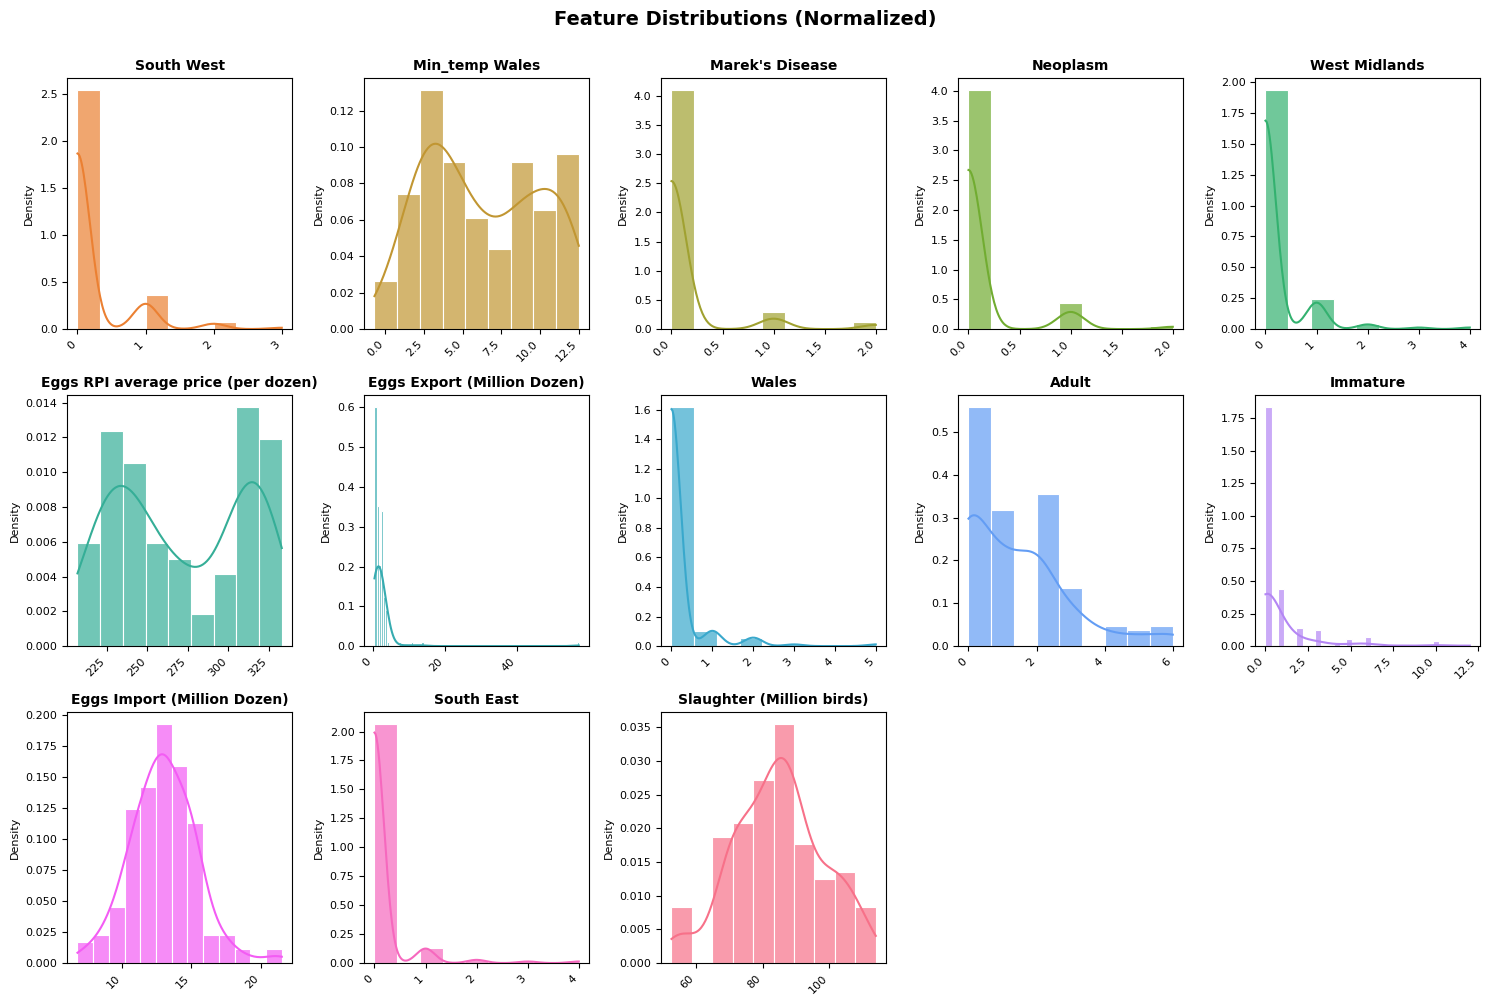

In [72]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.6, wspace=0.4) 

# Get numeric columns (excluding the response var if present)
num_cols = [col for col in df2.select_dtypes(include=np.number).columns if col != 'Total death']

# Create a color palette
palette = sns.color_palette("husl", len(num_cols))

# Calculate grid layout - 3 rows x 5 columns (15 slots, last empty)
rows, cols = 3, 5

for i, col in enumerate(num_cols, 1):
    ax = plt.subplot(rows, cols, i)
    
    # Create histogram with density curve
    sns.histplot(df2[col], kde=True, 
                color=palette[i % len(palette)], 
                linewidth=0.8, 
                edgecolor='white',
                alpha=0.7,
                stat='density')
    
    # Formatting
    ax.set_title(col, fontsize=10, pad=6, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Density', fontsize=8)
    ax.tick_params(axis='both', labelsize=8)
    plt.xticks(rotation=45, ha='right', fontsize=8)

# Hide any empty subplots
for j in range(i+1, rows*cols+1):
    plt.delaxes(plt.subplot(rows, cols, j))

plt.suptitle('Feature Distributions (Normalized)', y=1.0, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [62]:
# Ensure x is a DataFrame
if not isinstance(x, pd.DataFrame):
    x = pd.DataFrame(x)

# Remove 'const' column if it exists
try:
    x_guassian = x.drop(["const"], axis=1)
except KeyError:
    x_guassian = x.copy()

# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x_guassian.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x_guassian.index, columns=x_guassian.columns)

# Build and evaluate the linear regression model
std_x_df = sm.add_constant(std_x_df)
model_guassian = sm.OLS(y,std_x_df).fit()
pred_guassian = model_guassian.predict(std_x_df)
guassian_details = model_guassian.summary()
print(guassian_details)

                            OLS Regression Results                            
Dep. Variable:            Total death   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           2.30e-38
Time:                        01:43:28   Log-Likelihood:                -273.34
No. Observations:                 156   AIC:                             574.7
Df Residuals:                     142   BIC:                             617.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5513      0.117     21.786      0.0

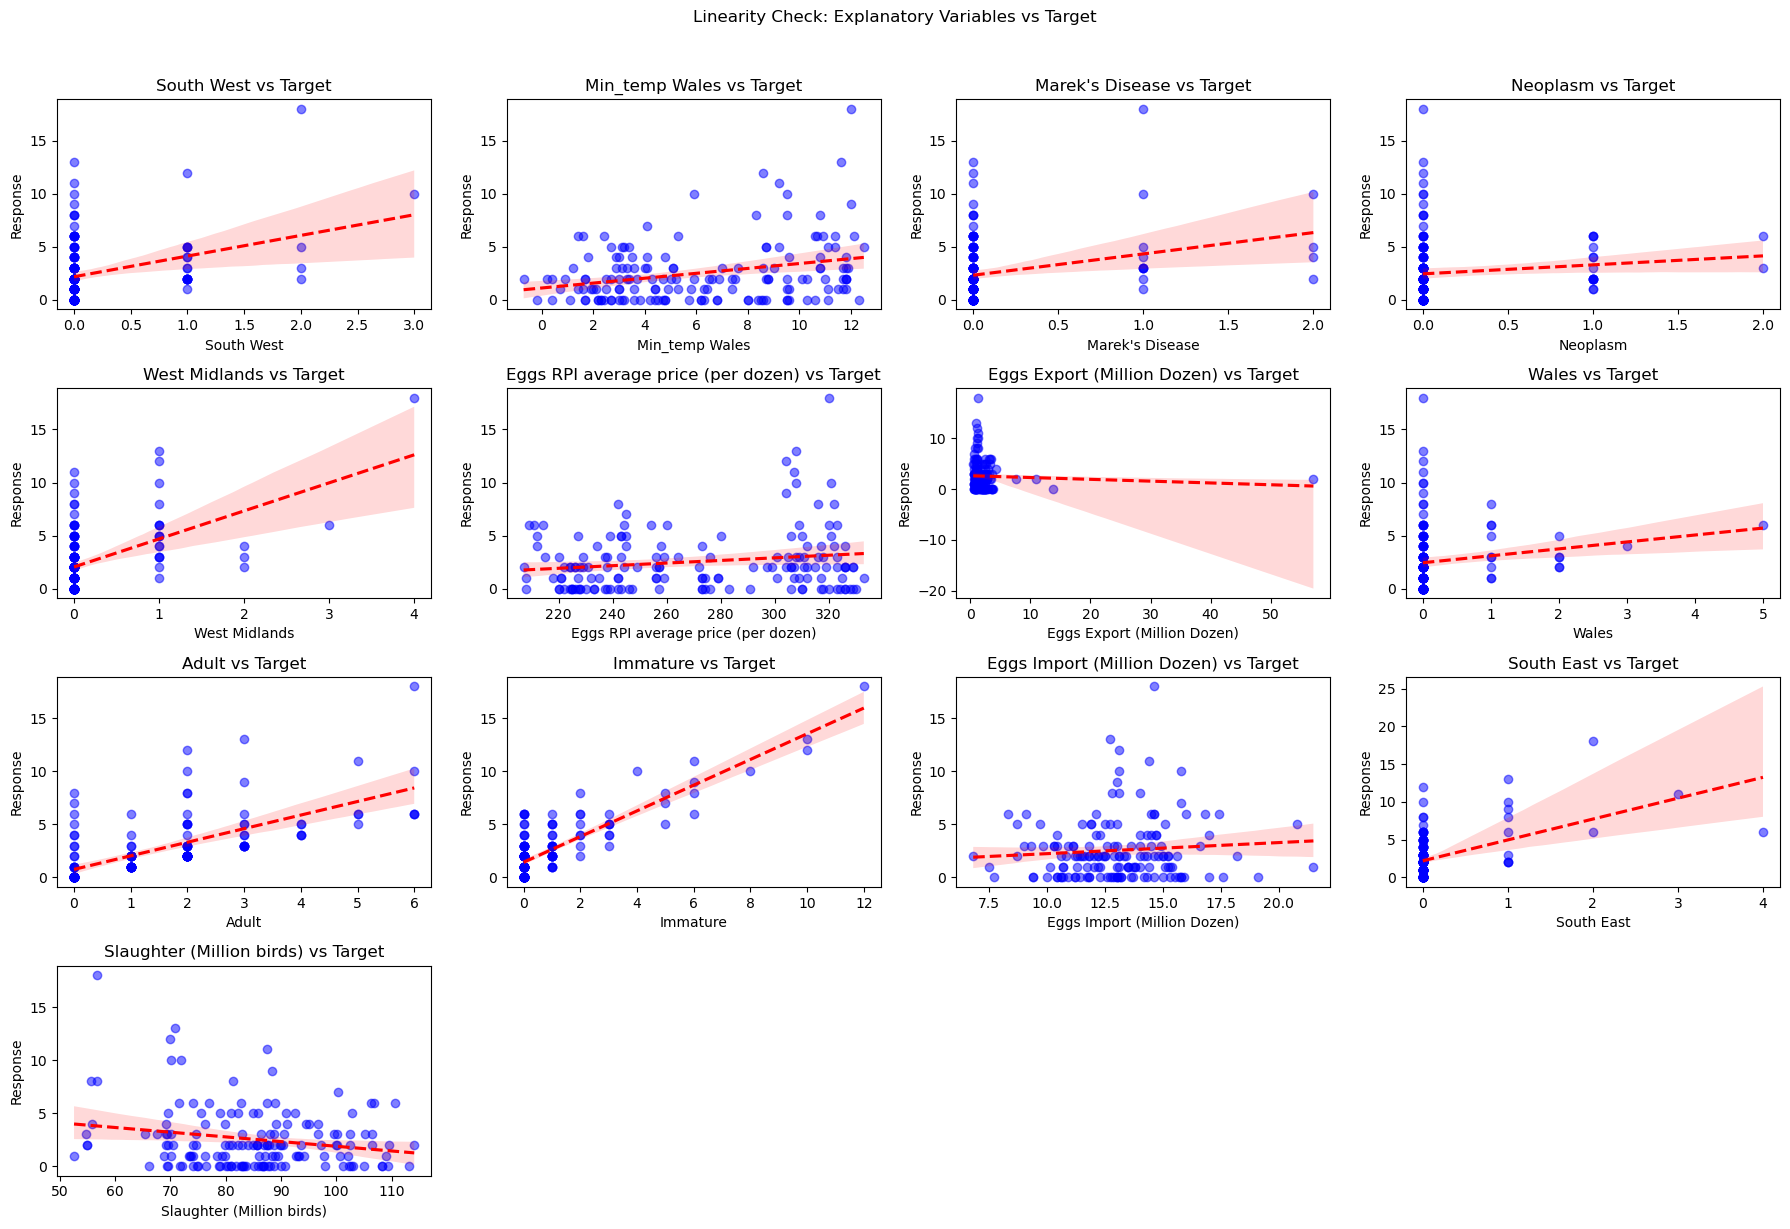

In [76]:
# Extract features and target
features_log = df2.iloc[:, :-1] 
target_log = df2.iloc[:, -1]    

# Set up the plot grid
n_cols = 4 
n_rows = (len(features_log.columns) + n_cols - 1) // n_cols  # Calculate needed rows

plt.figure(figsize=(18, 3*n_rows))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Create scatter plots for each feature
for i, col in enumerate(features_log.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.regplot(x=features_log[col], y=target, 
                scatter_kws={'alpha':0.5, 'color':'blue'},
                line_kws={'color':'red', 'linestyle':'--'})
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Response')

plt.suptitle('Linearity Check: Explanatory Variables vs Target', y=1.02)
plt.tight_layout()
plt.show()

#### Backward elimination technique for feature selection

In [51]:
# Define initial feature set and target
X_full = df2.drop(columns=['Total death'])
y = df2['Total death']

# Initialize tracking variables
remaining_features = X_full.columns.tolist()
r2_scores = []
r2_adj_scores = []
num_features = []

# Print initial setup
print("Starting backward elimination with features:", remaining_features)

# Perform backward elimination
while len(remaining_features) > 1:
    X_const = sm.add_constant(X_full[remaining_features])
    model = sm.OLS(y, X_const).fit()
    
    # Store current metrics
    current_r2 = model.rsquared
    current_r2_adj = model.rsquared_adj
    r2_scores.append(current_r2)
    r2_adj_scores.append(current_r2_adj)
    num_features.append(len(remaining_features))
    
    # Get p-values (excluding constant)
    p_values = model.pvalues.drop('const')
    max_p = p_values.max()
    
    # Check if max p-value is above 0.05
    if max_p > 0.05:
        feature_to_remove = p_values.idxmax()
        
        # Print removal decision
        print(f"\nStep {len(num_features)}: Removing '{feature_to_remove}' (p-value: {max_p:.4f})")
        print(f"Current features: {remaining_features}")
        print(f"Current p-values:\n{p_values.sort_values(ascending=False)}")
        print(f"R-squared after removal: {current_r2:.4f}")
        print(f"Adjusted R-squared after removal: {current_r2_adj:.4f}")
        
        # Remove the feature
        remaining_features.remove(feature_to_remove)
    else:
        print("\nAll remaining p-values are below 0.05")
        break

# Final model with remaining features
final_X_const = sm.add_constant(X_full[remaining_features])
final_model = sm.OLS(y, final_X_const).fit()

# Final results
print("\nFinal model after backward selection:")
print(f"Features retained: {remaining_features}")
print(f"Final R-squared: {final_model.rsquared:.4f}")
print(f"Final Adjusted R-squared: {final_model.rsquared_adj:.4f}")

Starting backward elimination with features: ['South West', 'Min_temp Wales', "Marek's Disease", 'Neoplasm', 'West Midlands', 'Eggs RPI average price (per dozen)', 'Eggs Export (Million Dozen)', 'Wales', 'Adult', 'Immature', 'Eggs Import (Million Dozen)', 'South East', 'Slaughter (Million birds)']

Step 1: Removing 'Min_temp Wales' (p-value: 0.8918)
Current features: ['South West', 'Min_temp Wales', "Marek's Disease", 'Neoplasm', 'West Midlands', 'Eggs RPI average price (per dozen)', 'Eggs Export (Million Dozen)', 'Wales', 'Adult', 'Immature', 'Eggs Import (Million Dozen)', 'South East', 'Slaughter (Million birds)']
Current p-values:
Min_temp Wales                        8.917575e-01
South West                            8.882908e-01
Slaughter (Million birds)             7.699837e-01
Neoplasm                              6.497904e-01
West Midlands                         4.909008e-01
Eggs Import (Million Dozen)           4.761413e-01
Marek's Disease                       4.504601e-01
E

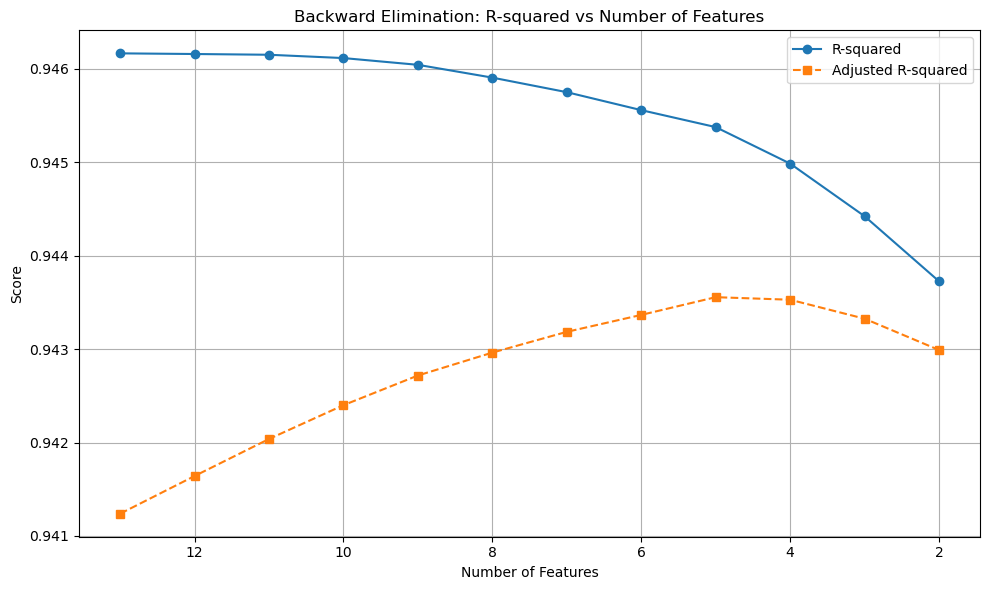

In [52]:
# Plotting (keeping your original visualization style)
plt.figure(figsize=(10, 6))
plt.plot(num_features, r2_scores, marker='o', label='R-squared')
plt.plot(num_features, r2_adj_scores, marker='s', linestyle='--', label='Adjusted R-squared')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Backward Elimination: R-squared vs Number of Features')
plt.gca().invert_xaxis()  # Show decreasing features from left to right
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

=> The optimal number of explanatory variables is 5, as both the R-squared and adjusted R-squared values are high at this point.

Final top 5: Immature, Adult, Eggs RPI average price (per dozen), South East, Wales.

#### Applying PCA

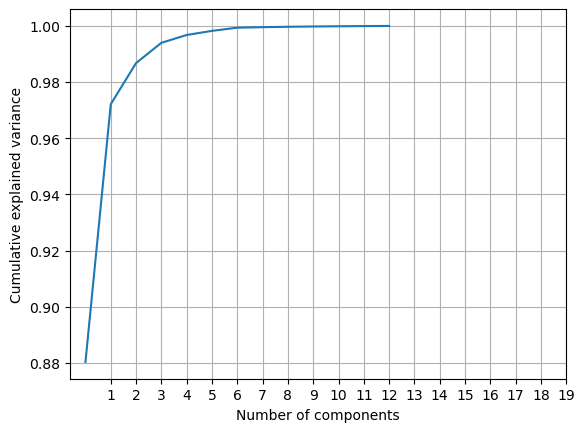

In [55]:
# Applying PCA on the new dataset (after removing all multicollinearity)

pca = PCA().fit(X_train_mlr1)

# Plot the cumulative explained variance versus number of PCA components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1,20))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

From 5 components onwards we cannot see any improvement => top 5 components are the best option.

In [57]:
pca = PCA(n_components=5)
X_train_p1 = pca.fit_transform(X_train_mlr1)

# Compare the dimensionality of the original data vs. its dimensionality reduced version
print("Dimension of original data:", X_train_mlr1.shape)
print("Dimension of PCA-reduced data:", X_train_p1.shape)

# Build a linear regression model
model_pca1 = LinearRegression()
model_pca1.fit(X_train_p1, y_train_mlr1)

# Use linear regression to predict the values of (y) in the training set
y_pred_pca1 = model_pca1.predict(X_train_p1)

# Get R-Squared score
r_2_pca1 = metrics.r2_score(y_train_mlr1, y_pred_pca1)
print("Trained with 5-component PCA:")
print("R^2: ", r_2_pca1)

Dimension of original data: (124, 13)
Dimension of PCA-reduced data: (124, 5)
Trained with 5-component PCA:
R^2:  0.19307966456721126


R-squared dropped significantly => We should not apply PCA in this model

#### Improvement in Predictive Power Across Models (R-squared)

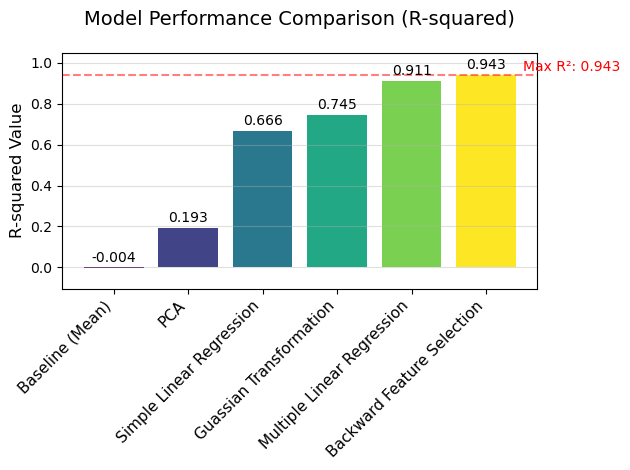

In [65]:
# Define model names and corresponding R-squared values
model_names = [
    'Baseline (Mean)',
    'PCA',
    'Simple Linear Regression',
    'Guassian Transformation',
    'Multiple Linear Regression',
    'Backward Feature Selection'
]

r2_values = [
    -0.004237,   # Baseline
    0.193,       # PCA
    0.665805,    # Simple Linear Regression
    0.745,        # Guassian Transformation
    0.911,       # Full Multiple Linear Regression
    0.943        # After Backward Selection
]

# Use a bar plot instead of line for categorical comparison
bars = plt.bar(model_names, r2_values, color=plt.cm.viridis(np.linspace(0, 1, len(model_names))))

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.015,
             f'{height:.3f}',
             ha='center', va='bottom')

# Customize appearance
plt.title('Model Performance Comparison (R-squared)', fontsize=14, pad=20)
plt.ylabel('R-squared Value', fontsize=12)
plt.ylim(min(r2_values) - 0.1, 1.05)
plt.xticks(rotation=45, ha='right', fontsize=11)  # Diagonal labels for readability
plt.grid(axis='y', alpha=0.4)

# Add horizontal line at maximum R-squared for reference
plt.axhline(y=max(r2_values), color='r', linestyle='--', alpha=0.5)
plt.text(len(model_names)-0.5, max(r2_values)+0.02, 
         f'Max R²: {max(r2_values):.3f}',
         color='r')

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

### Time Series Regression

Top 10 correlating weather features:
Min_temp Wales              0.292046
Min_temp Southwest          0.290600
Min_temp West Midlands      0.285110
Min_temp Scotland           0.283967
Min_temp South East         0.281501
Min_temp East of England    0.277460
Max_temp Scotland           0.255069
Max_temp Southwest          0.243171
Max_temp Wales              0.242828
Max_temp East of England    0.242572
dtype: float64
ADF Statistic: -2.5289149212011144
p-value: 0.1085965682934224
Critical Values:
	1%: -3.4769274060112707
	5%: -2.8819726324025625
	10%: -2.577665408088415


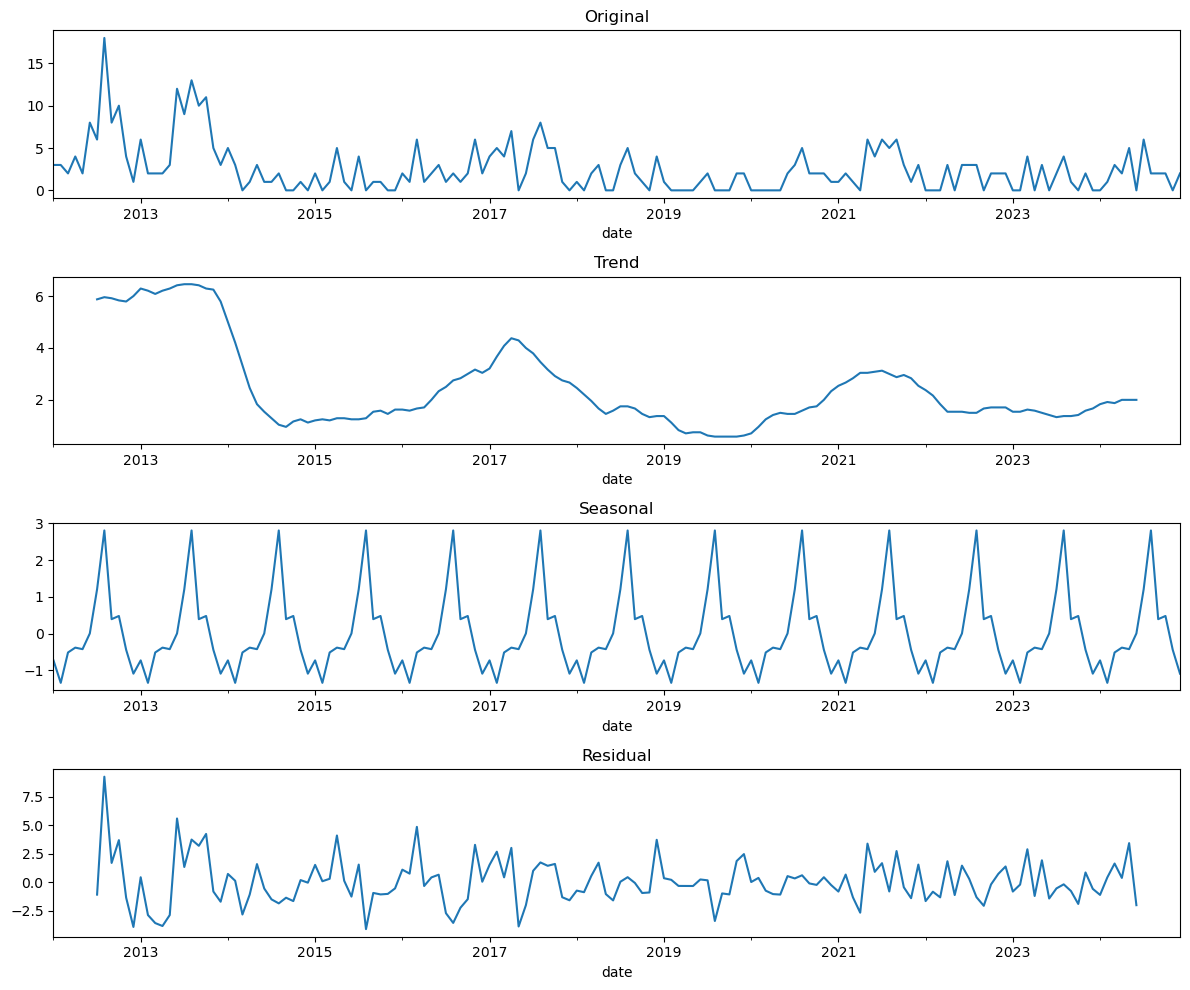

In [77]:
# Create datetime index
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df = df.set_index('date')

# Group weather-related features by region
regions = ['Scotland', 'East of England', 'South West', 'Wales', 'West Midlands', 'South East']
weather_features = {
    region: [
        f'Max_temp_{region}',
        f'Min_temp_{region}',
        f'Days of frost_{region}',
        f'Hours of rainfall_{region}',
        f'Hours of sunshine_{region}'
    ] for region in regions
}

weather_cols = [col for col in df.columns if 
                ('temp' in col.lower()) or 
                ('rain' in col.lower()) or 
                ('frost' in col.lower()) or 
                ('sunshine' in col.lower())]

# Calculate correlations with Total death
correlations = df[weather_cols].corrwith(df['Total death']).abs().sort_values(ascending=False)
print("Top 10 correlating weather features:")
print(correlations[:10])

# Select exogenous variables (example with top 5 weather features)
exog_vars = correlations[1:6].index.tolist()  # Excluding 'Total death' itself

def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

check_stationarity(df['Total death'])

decomposition = seasonal_decompose(df['Total death'], period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

decomposition.observed.plot(ax=ax1, title='Original')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()

ADF Statistic: -2.528 is closer to 0 compared to critical values => non-stationary (it has trends, seasonality, or other time-dependent structure.

p-value 0.108 > 0.05 → High probability the data is non-stationary.

In [78]:
# Define and fit SARIMAX model
def fit_sarimax(data, exog, order=(1,1,1), seasonal_order=(1,1,1,12)):
    model = SARIMAX(
        endog=data,
        exog=exog,
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    results = model.fit()
    return results

# Prepare exogenous variables
X = df[exog_vars]

# Train-test split (80-20)
train_size = int(len(df) * 0.8)
train_data = df['Total death'][:train_size]
test_data = df['Total death'][train_size:]
train_exog = X[:train_size]
test_exog = X[train_size:]

# Fit model
model_results = fit_sarimax(
    train_data,
    train_exog,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)

# Print model summary
print(model_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Total death   No. Observations:                  124
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -226.336
Date:                            Wed, 23 Apr 2025   AIC                            472.671
Time:                                    02:08:24   BIC                            498.418
Sample:                                01-01-2012   HQIC                           483.082
                                     - 04-01-2022                                         
Covariance Type:                              opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Min_temp Southwest           0.9876      1.174      0.841      0.400      -1.314      

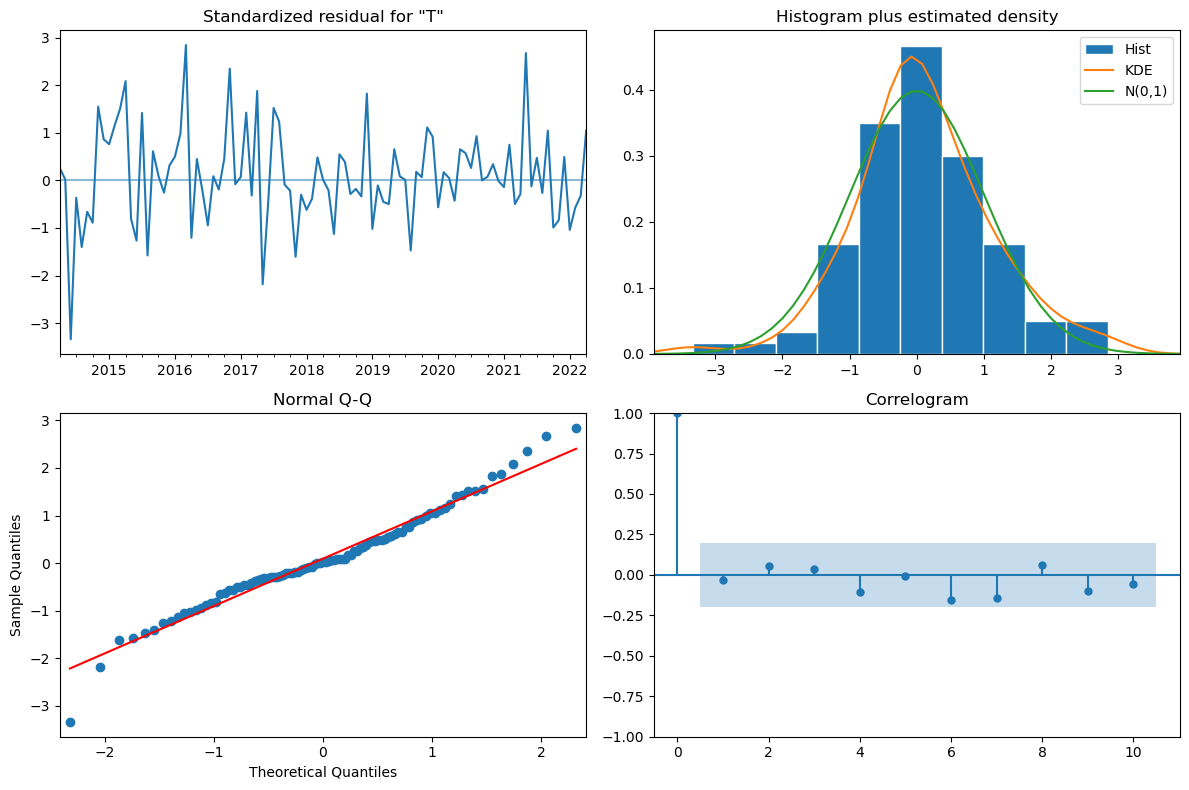

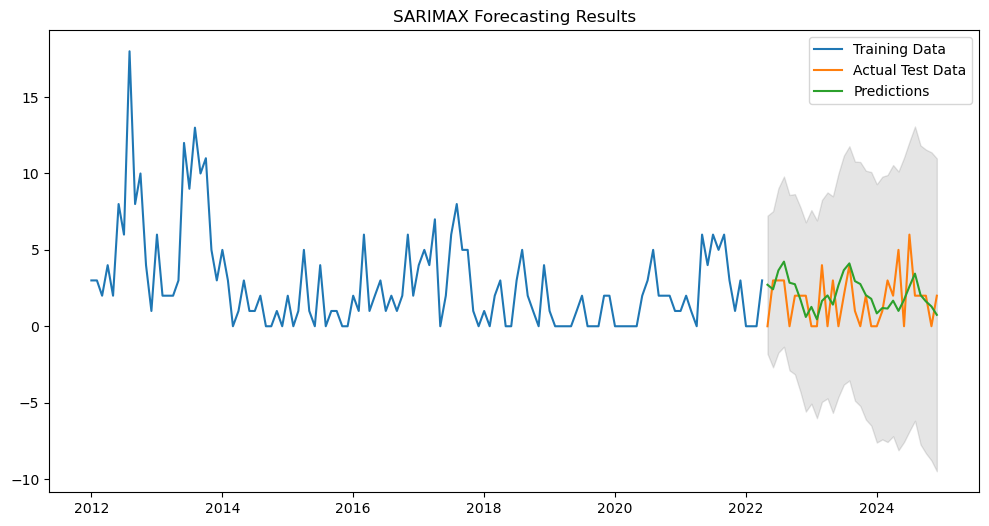

In [79]:
# Plot diagnostic plots
model_results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()

# Get predictions
predictions = model_results.get_forecast(
    steps=len(test_data),
    exog=test_exog
)

# Calculate confidence intervals
pred_mean = predictions.predicted_mean
pred_ci = predictions.conf_int()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(test_data.index, pred_mean, label='Predictions')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.1)
plt.title('SARIMAX Forecasting Results')
plt.legend()
plt.show()

Time-Series doesn't really capture the trends

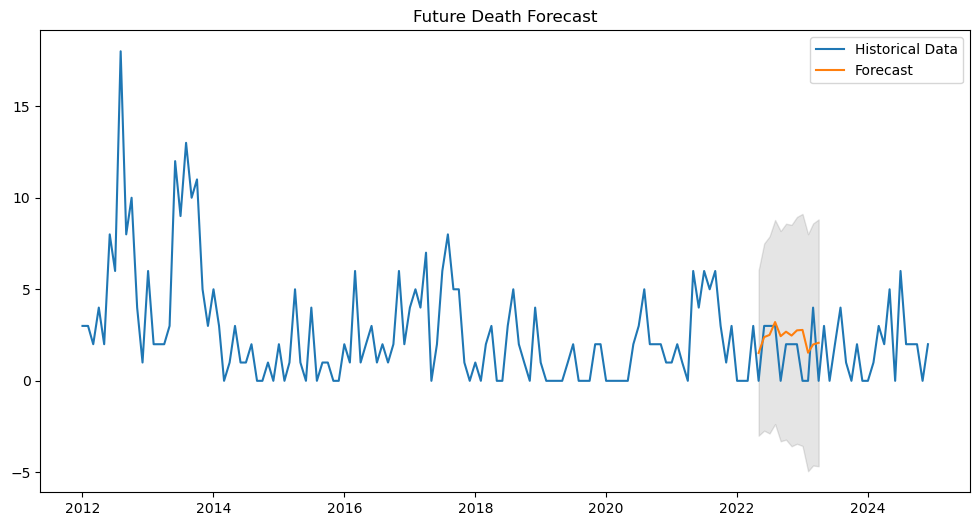

In [80]:
# For future forecasting (2024), prepare future exogenous variables
future_exog = df[exog_vars].tail(12)  # Use last 12 months pattern or your projections

# Generate forecast
future_forecast = model_results.get_forecast(steps=12, exog=future_exog)
forecast_mean = future_forecast.predicted_mean
forecast_ci = future_forecast.conf_int()

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total death'], label='Historical Data')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='k', alpha=.1)
plt.title('Future Death Forecast')
plt.legend()
plt.show()